# Dandiset 001176: Cortical acetylcholine dynamics - Exploration Notebook

**Note: This notebook was AI-generated by dandi-notebook-gen and has *not* been fully verified. Review all code and results carefully before trusting their scientific validity.**

---

## About this dataset

**Name:** Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state

**Description:**

This dataset includes simultaneous in vivo imaging data of acetylcholine (ACh) sensors and GCaMP-expressing axons in the cortex during spontaneous changes in behavioral states in awake animals. It features recordings of ACh activity, axon activity, and pupil size.

**Contributors:** National Institutes of Health (NIH), Reimer, Jacob, Neyhart, Erin

**Keywords:** acetylcholine, brain states, two-photon-imaging, neuromodulator, Axon imaging

**Variables measured:** ImagingPlane, PlaneSegmentation, EyeTracking, PupilTracking, ProcessingModule, OpticalChannel, SpatialSeries

**License:** CC-BY-4.0 | **Citation:** Reimer, Jacob; Neyhart, Erin (2025) Cortical acetylcholine dynamics... DANDI Archive. https://dandiarchive.org/dandiset/001176/draft

---

## Setup
Required packages (no installation in notebook).

- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `numpy`
- `pandas`
- `seaborn`

**If you don't have them installed, run this in your terminal:**

```
pip install dandi pynwb remfile h5py matplotlib numpy pandas seaborn
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile

sns.set_theme()

## List all assets in the Dandiset via DANDI API
This will retrieve metadata and list of files.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001176", "draft")
assets = list(dandiset.get_assets())
print(f"Total number of assets: {len(assets)}")
for asset in assets[:5]:
    print(f"{asset.path} [{asset.size/1e6:.2f} MB] id={asset.identifier}")

Total number of assets: 132
sub-16/sub-16_ses-16-4-2-Ach-M1_behavior+ophys.nwb [7.77 MB] id=7c7c1782-8b43-4fb0-9267-ca505d6ba0e9
sub-18/sub-18_ses-18-1-2-Ach-M1_behavior+ophys.nwb [5.00 MB] id=07ff70b6-ba5b-4a6e-9384-9230a4ab46c4
sub-16/sub-16_ses-16-1-2-Ach-M1_behavior+ophys.nwb [4.31 MB] id=4550467f-b94d-406b-8e30-24dd6d4941c1
sub-16/sub-16_ses-16-4-1-Ach-M1_behavior+ophys.nwb [8.00 MB] id=b9e24aca-6472-4853-a696-afab966a725e
sub-16/sub-16_ses-16-3-1-Ach-M1_behavior+ophys.nwb [7.88 MB] id=4b99f1c4-7522-4160-aad1-d2d0a552a443


## Select one NWB file to explore
We will use:

```
sub-16/sub-16_ses-16-3-1-Ach-M1_behavior+ophys.nwb
```

URL:

```
https://api.dandiarchive.org/api/assets/4b99f1c4-7522-4160-aad1-d2d0a552a443/download/
```

In [3]:
url = "https://api.dandiarchive.org/api/assets/4b99f1c4-7522-4160-aad1-d2d0a552a443/download/"
file = remfile.File(url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f)
nwb = io.read()

print(type(nwb))
print("Session:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Subject ID:", nwb.subject.subject_id)
print("Date of Birth:", nwb.subject.date_of_birth)
print("Sex:", nwb.subject.sex)
print("Species:", nwb.subject.species)
print("Lab:", nwb.lab)
print("Institution:", nwb.institution)

<class 'pynwb.file.NWBFile'>
Session: Two-Photon in-vivo imaging
Identifier: JR_BCM_16_3_1_Ach_M1
Subject ID: 16
Date of Birth: 2023-03-20 00:00:00-05:51
Sex: F
Species: Mus musculus
Lab: Reimer, Jacob
Institution: Baylor College of Medicine


## Eye Tracking data: Pupil position

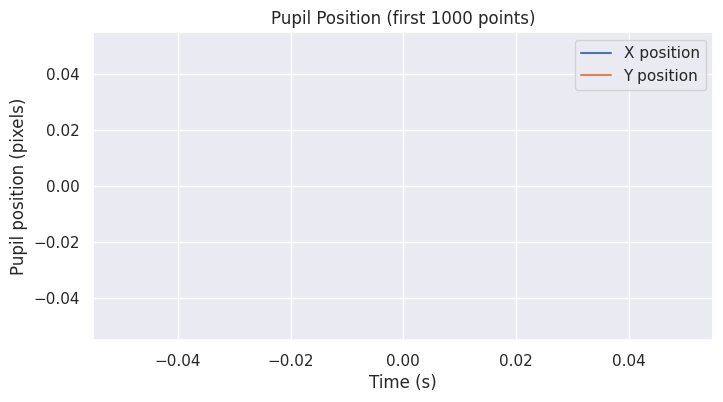

In [4]:
eye_pos = nwb.acquisition["EyeTracking"].spatial_series["eye_position"]
timestamps = eye_pos.timestamps[:1000]
positions = eye_pos.data[:1000, :]
plt.figure(figsize=(8,4))
plt.plot(timestamps, positions[:,0], label="X position")
plt.plot(timestamps, positions[:,1], label="Y position")
plt.xlabel("Time (s)")
plt.ylabel("Pupil position (pixels)")
plt.legend()
plt.title("Pupil Position (first 1000 points)")
plt.show()

## Pupil radius

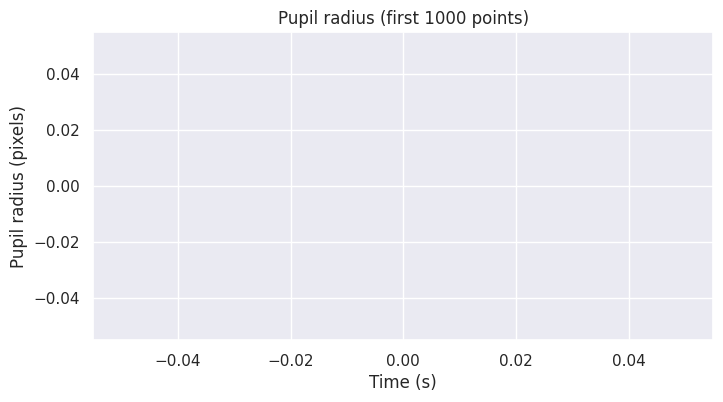

In [5]:
pupil_rad = nwb.acquisition["PupilTracking"].time_series["pupil_raw_radius"]
ts = pupil_rad.timestamps[:1000]
radii = pupil_rad.data[:1000]
plt.figure(figsize=(8,4))
plt.plot(ts, radii)
plt.xlabel("Time (s)")
plt.ylabel("Pupil radius (pixels)")
plt.title("Pupil radius (first 1000 points)")
plt.show()

## Treadmill velocity

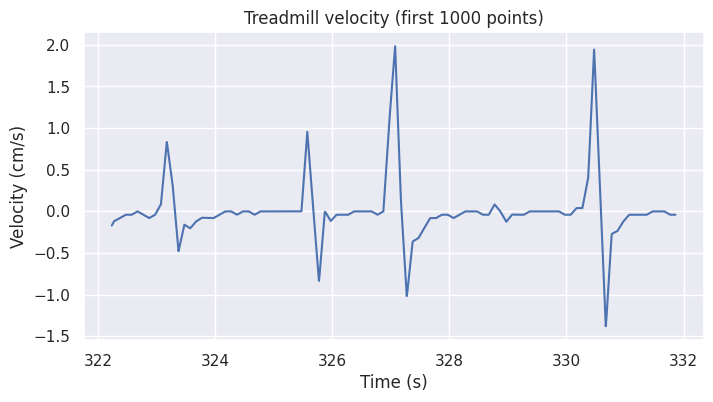

In [6]:
vel = nwb.acquisition["treadmill_velocity"]
ts = vel.timestamps[:1000]
velocity = vel.data[:1000]
plt.figure(figsize=(8,4))
plt.plot(ts, velocity)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (cm/s)")
plt.title("Treadmill velocity (first 1000 points)")
plt.show()

## Fluorescence traces from ophys

Fluorescence data shape (subset): (1000, 1)


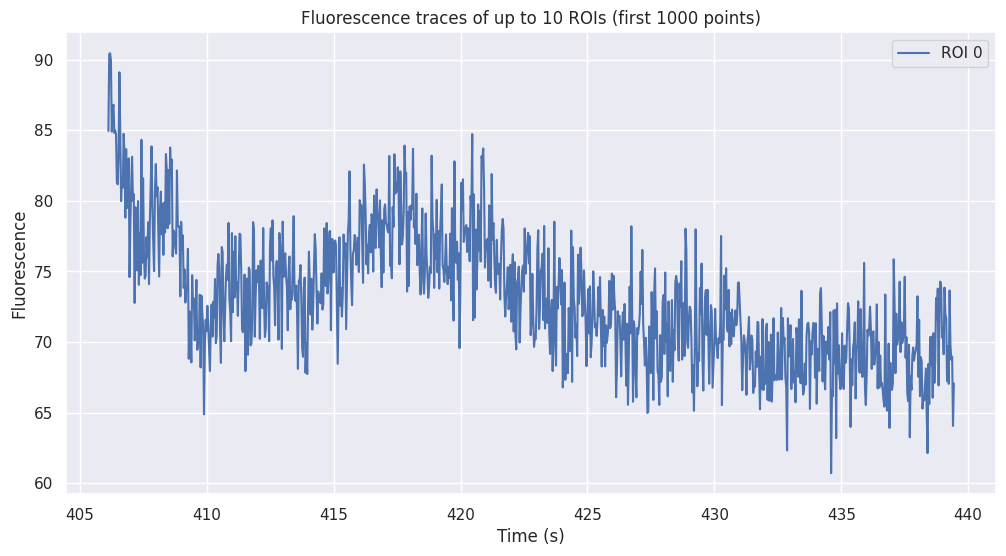

In [7]:
fluor = nwb.processing["ophys"].data_interfaces["Fluorescence"]
roi_response = fluor.roi_response_series["RoiResponseSeries1"]
roi_data = roi_response.data[:1000, :10]  # first 1000 frames, up to 10 ROIs
print("Fluorescence data shape (subset):", roi_data.shape)
ts = roi_response.timestamps[:1000]

plt.figure(figsize=(12,6))
for i in range(roi_data.shape[1]):
    plt.plot(ts, roi_data[:,i], label=f'ROI {i}')
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence")
plt.title("Fluorescence traces of up to 10 ROIs (first 1000 points)")
plt.legend()
plt.show()

## Image masks and segmentation

Number of segmented ROIs: 1


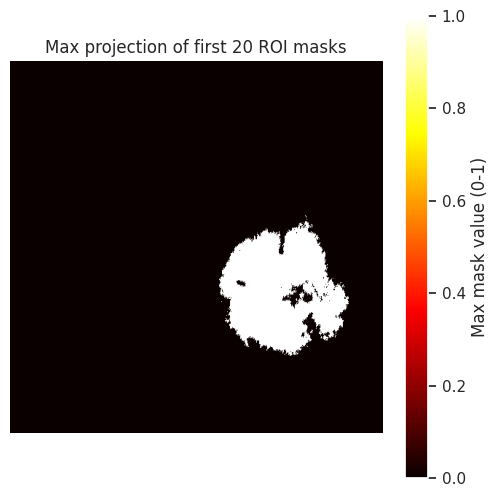

In [8]:
ps = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation1"]
ids = ps.id[:]
print(f"Number of segmented ROIs: {len(ids)}")

image_masks = ps['image_mask'][:min(20, len(ids))]  # Up to 20 masks
max_mask = np.max(image_masks, axis=0)

plt.figure(figsize=(6,6))
plt.imshow(max_mask, cmap='hot')
plt.colorbar(label="Max mask value (0-1)")
plt.title("Max projection of first 20 ROI masks")
plt.axis('off')
plt.show()

## Summary images

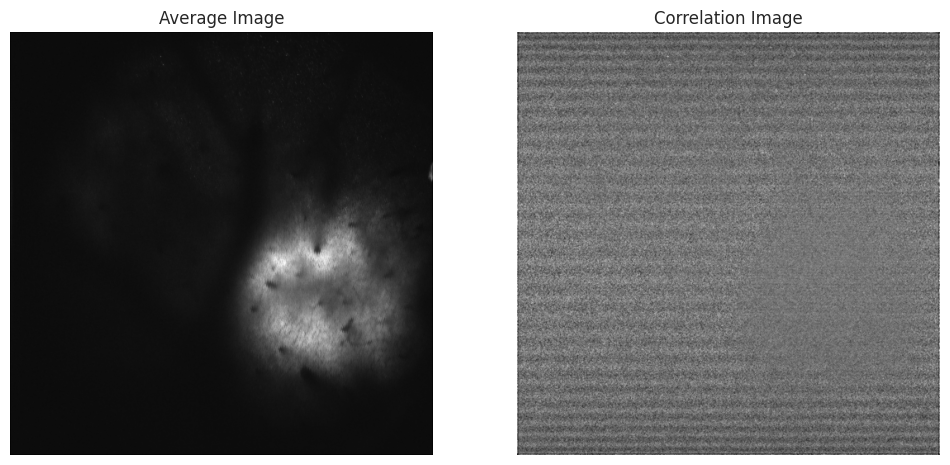

In [9]:
summary_img = nwb.processing["ophys"].data_interfaces["SummaryImages_chan1"].images
ave_img = summary_img["average"].data[:]
corr_img = summary_img["correlation"].data[:]

fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].imshow(ave_img, cmap='gray')
axs[0].set_title("Average Image")
axs[0].axis('off')

axs[1].imshow(corr_img, cmap='gray')
axs[1].set_title("Correlation Image")
axs[1].axis('off')

plt.show()

## Summary
This notebook demonstrated:
- Querying a Dandiset via the DANDI API  
- Remote access to NWB files without downloading the dataset  
- Exploration and plotting of major data streams: pupil location and size, movement, fluorescence, segmentation and summary images  

It serves as an example starting point for more detailed analyses depending on your scientific questions.